In [2]:
!pip install --upgrade diffusers transformers accelerate -q

In [ ]:
from pathlib import Path
import tqdm
import torch
import pandas as pd
import numpy as np
from diffusers import StableDiffusionPipeline
from transformers import pipeline, set_seed
import matplotlib.pyplot as plt
import cv2

In [ ]:
import torch
class CFG:
    device = "cuda"  # Set to "cpu" if GPU is not available
    seed = 42
    generator = torch.Generator(device).manual_seed(seed)
    image_gen_steps = 35
    image_gen_model_id = "stabilityai/stable-diffusion-2"
    image_gen_size = (400, 400)
    image_gen_guidance_scale = 9
    prompt_gen_model_id = "gpt2"
    prompt_dataset_size = 6
    prompt_max_length = 12

In [ ]:
image_gen_model = StableDiffusionPipeline.from_pretrained(
    CFG.image_gen_model_id,
    torch_dtype=torch.float16,
    revision="fp16",
    use_auth_token='your_hugging_face_auth_token'  # Replace with your token
)
image_gen_model = image_gen_model.to(CFG.device)

In [ ]:

def generate_image(prompt, model):
    image = model(
        prompt,
        num_inference_steps=CFG.image_gen_steps,
        generator=CFG.generator,
        guidance_scale=CFG.image_gen_guidance_scale
    ).images[0]

    # Resize the image to the specified size
    image = image.resize(CFG.image_gen_size)
    return image

  0%|          | 0/35 [00:00<?, ?it/s]

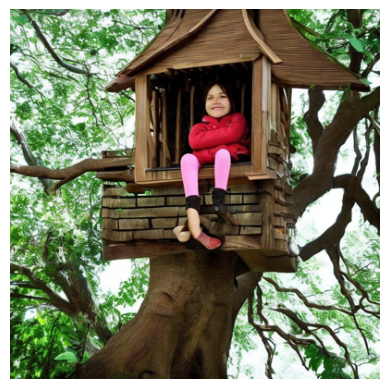

In [3]:

output_image = generate_image("a girl in tree house", image_gen_model)

# Display the generated image
plt.imshow(output_image)
plt.axis("off")
plt.show()